In [1]:
%cd /content/drive/MyDrive/CS 7389G

/content/drive/MyDrive/CS 7389G


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import tensorflow as tf

In [3]:
df1_adm=pd.read_csv("admissions.csv")
df1_adm

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,language,marital_status,race,edregtime,edouttime,hospital_expire_flag
0,10000032,22595853,2180-05-06 22:23:00,2180-05-07 17:15:00,NaN,URGENT,P874LG,TRANSFER FROM HOSPITAL,HOME,Other,ENGLISH,WIDOWED,WHITE,2180-05-06 19:17:00,2180-05-06 23:30:00,0
1,10000032,22841357,2180-06-26 18:27:00,2180-06-27 18:49:00,NaN,EW EMER.,P09Q6Y,EMERGENCY ROOM,HOME,Medicaid,ENGLISH,WIDOWED,WHITE,2180-06-26 15:54:00,2180-06-26 21:31:00,0
2,10000032,25742920,2180-08-05 23:44:00,2180-08-07 17:50:00,NaN,EW EMER.,P60CC5,EMERGENCY ROOM,HOSPICE,Medicaid,ENGLISH,WIDOWED,WHITE,2180-08-05 20:58:00,2180-08-06 01:44:00,0
3,10000032,29079034,2180-07-23 12:35:00,2180-07-25 17:55:00,NaN,EW EMER.,P30KEH,EMERGENCY ROOM,HOME,Medicaid,ENGLISH,WIDOWED,WHITE,2180-07-23 05:54:00,2180-07-23 14:00:00,0
4,10000068,25022803,2160-03-03 23:16:00,2160-03-04 06:26:00,NaN,EU OBSERVATION,P51VDL,EMERGENCY ROOM,NaN,Other,ENGLISH,SINGLE,WHITE,2160-03-03 21:55:00,2160-03-04 06:26:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431226,19999828,25744818,2149-01-08 16:44:00,2149-01-18 17:00:00,NaN,EW EMER.,P75BG6,TRANSFER FROM HOSPITAL,HOME HEALTH CARE,Other,ENGLISH,SINGLE,WHITE,2149-01-08 09:11:00,2149-01-08 18:12:00,0
431227,19999828,29734428,2147-07-18 16:23:00,2147-08-04 18:10:00,NaN,EW EMER.,P16C7J,PHYSICIAN REFERRAL,HOME HEALTH CARE,Other,ENGLISH,SINGLE,WHITE,2147-07-17 17:18:00,2147-07-18 17:34:00,0
431228,19999840,21033226,2164-09-10 13:47:00,2164-09-17 13:42:00,2164-09-17 13:42:00,EW EMER.,P58A9J,EMERGENCY ROOM,DIED,Other,ENGLISH,WIDOWED,WHITE,2164-09-10 11:09:00,2164-09-10 14:46:00,1
431229,19999840,26071774,2164-07-25 00:27:00,2164-07-28 12:15:00,NaN,EW EMER.,P506DE,EMERGENCY ROOM,HOME,Other,ENGLISH,WIDOWED,WHITE,2164-07-24 21:16:00,2164-07-25 01:20:00,0


In [4]:
df1_adm=df1_adm.drop(columns=['admit_provider_id', 'edregtime', 'edouttime', 'hospital_expire_flag'])
df1_adm

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,marital_status,race
0,10000032,22595853,2180-05-06 22:23:00,2180-05-07 17:15:00,NaN,URGENT,TRANSFER FROM HOSPITAL,HOME,Other,ENGLISH,WIDOWED,WHITE
1,10000032,22841357,2180-06-26 18:27:00,2180-06-27 18:49:00,NaN,EW EMER.,EMERGENCY ROOM,HOME,Medicaid,ENGLISH,WIDOWED,WHITE
2,10000032,25742920,2180-08-05 23:44:00,2180-08-07 17:50:00,NaN,EW EMER.,EMERGENCY ROOM,HOSPICE,Medicaid,ENGLISH,WIDOWED,WHITE
3,10000032,29079034,2180-07-23 12:35:00,2180-07-25 17:55:00,NaN,EW EMER.,EMERGENCY ROOM,HOME,Medicaid,ENGLISH,WIDOWED,WHITE
4,10000068,25022803,2160-03-03 23:16:00,2160-03-04 06:26:00,NaN,EU OBSERVATION,EMERGENCY ROOM,NaN,Other,ENGLISH,SINGLE,WHITE
...,...,...,...,...,...,...,...,...,...,...,...,...
431226,19999828,25744818,2149-01-08 16:44:00,2149-01-18 17:00:00,NaN,EW EMER.,TRANSFER FROM HOSPITAL,HOME HEALTH CARE,Other,ENGLISH,SINGLE,WHITE
431227,19999828,29734428,2147-07-18 16:23:00,2147-08-04 18:10:00,NaN,EW EMER.,PHYSICIAN REFERRAL,HOME HEALTH CARE,Other,ENGLISH,SINGLE,WHITE
431228,19999840,21033226,2164-09-10 13:47:00,2164-09-17 13:42:00,2164-09-17 13:42:00,EW EMER.,EMERGENCY ROOM,DIED,Other,ENGLISH,WIDOWED,WHITE
431229,19999840,26071774,2164-07-25 00:27:00,2164-07-28 12:15:00,NaN,EW EMER.,EMERGENCY ROOM,HOME,Other,ENGLISH,WIDOWED,WHITE


In [5]:
df2_icu=pd.read_csv("icustays.csv")
df2_icu

,subject_id,hadm_id,stay_id,first_careunit,last_careunit,intime,outtime
0,10000032,29079034,39553978,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),7/23/2180 14:00,7/23/2180 23:50
1,10000980,26913865,39765666,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),6/27/2189 8:42,6/27/2189 20:38
2,10001217,24597018,37067082,Surgical Intensive Care Unit (SICU),Surgical Intensive Care Unit (SICU),11/20/2157 19:18,11/21/2157 22:08
3,10001217,27703517,34592300,Surgical Intensive Care Unit (SICU),Surgical Intensive Care Unit (SICU),12/19/2157 15:42,12/20/2157 14:27
4,10001725,25563031,31205490,Medical/Surgical Intensive Care Unit (MICU/SICU),Medical/Surgical Intensive Care Unit (MICU/SICU),4/11/2110 15:52,4/12/2110 23:59
...,...,...,...,...,...,...,...
73176,19999442,26785317,32336619,Surgical Intensive Care Unit (SICU),Surgical Intensive Care Unit (SICU),11/19/2148 14:23,11/26/2148 13:12
73177,19999625,25304202,31070865,Medical/Surgical Intensive Care Unit (MICU/SICU),Medical/Surgical Intensive Care Unit (MICU/SICU),10/10/2139 19:18,10/11/2139 18:21
73178,19999828,25744818,36075953,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),1/8/2149 18:12,1/10/2149 13:11
73179,19999840,21033226,38978960,Trauma SICU (TSICU),Surgical Intensive Care Unit (SICU),9/12/2164 9:26,9/17/2164 16:35


In [6]:
df_merged = df1_adm.merge(df2_icu, how='outer')
df_merged

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,marital_status,race,stay_id,first_careunit,last_careunit,intime,outtime
0,10000032,22595853,2180-05-06 22:23:00,2180-05-07 17:15:00,NaN,URGENT,TRANSFER FROM HOSPITAL,HOME,Other,ENGLISH,WIDOWED,WHITE,NaN,NaN,NaN,NaN,NaN
1,10000032,22841357,2180-06-26 18:27:00,2180-06-27 18:49:00,NaN,EW EMER.,EMERGENCY ROOM,HOME,Medicaid,ENGLISH,WIDOWED,WHITE,NaN,NaN,NaN,NaN,NaN
2,10000032,25742920,2180-08-05 23:44:00,2180-08-07 17:50:00,NaN,EW EMER.,EMERGENCY ROOM,HOSPICE,Medicaid,ENGLISH,WIDOWED,WHITE,NaN,NaN,NaN,NaN,NaN
3,10000032,29079034,2180-07-23 12:35:00,2180-07-25 17:55:00,NaN,EW EMER.,EMERGENCY ROOM,HOME,Medicaid,ENGLISH,WIDOWED,WHITE,39553978.0,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),7/23/2180 14:00,7/23/2180 23:50
4,10000068,25022803,2160-03-03 23:16:00,2160-03-04 06:26:00,NaN,EU OBSERVATION,EMERGENCY ROOM,NaN,Other,ENGLISH,SINGLE,WHITE,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438168,19999828,25744818,2149-01-08 16:44:00,2149-01-18 17:00:00,NaN,EW EMER.,TRANSFER FROM HOSPITAL,HOME HEALTH CARE,Other,ENGLISH,SINGLE,WHITE,36075953.0,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),1/8/2149 18:12,1/10/2149 13:11
438169,19999828,29734428,2147-07-18 16:23:00,2147-08-04 18:10:00,NaN,EW EMER.,PHYSICIAN REFERRAL,HOME HEALTH CARE,Other,ENGLISH,SINGLE,WHITE,NaN,NaN,NaN,NaN,NaN
438170,19999840,21033226,2164-09-10 13:47:00,2164-09-17 13:42:00,2164-09-17 13:42:00,EW EMER.,EMERGENCY ROOM,DIED,Other,ENGLISH,WIDOWED,WHITE,38978960.0,Trauma SICU (TSICU),Surgical Intensive Care Unit (SICU),9/12/2164 9:26,9/17/2164 16:35
438171,19999840,26071774,2164-07-25 00:27:00,2164-07-28 12:15:00,NaN,EW EMER.,EMERGENCY ROOM,HOME,Other,ENGLISH,WIDOWED,WHITE,NaN,NaN,NaN,NaN,NaN


In [7]:
df3_serv=pd.read_csv('services.csv')
df3_serv

,subject_id,hadm_id,transfertime,prev_service,curr_service
0,10000032,22595853,5/6/2180 22:24,NaN,MED
1,10000032,22841357,6/26/2180 18:28,NaN,MED
2,10000032,25742920,8/5/2180 23:44,NaN,MED
3,10000032,29079034,7/23/2180 12:36,NaN,MED
4,10000068,25022803,3/3/2160 23:17,NaN,MED
...,...,...,...,...,...
468024,19999828,29734428,7/18/2147 16:24,NaN,SURG
468025,19999840,21033226,9/10/2164 13:49,NaN,NMED
468026,19999840,21033226,9/14/2164 10:40,NMED,MED
468027,19999840,26071774,7/25/2164 0:27,NaN,NMED


In [8]:
df3_serv=df3_serv.drop(columns=['transfertime','prev_service'], axis=1)
df3_serv

,subject_id,hadm_id,curr_service
0,10000032,22595853,MED
1,10000032,22841357,MED
2,10000032,25742920,MED
3,10000032,29079034,MED
4,10000068,25022803,MED
...,...,...,...
468024,19999828,29734428,SURG
468025,19999840,21033226,NMED
468026,19999840,21033226,MED
468027,19999840,26071774,NMED


In [9]:
df_merged_2 = df_merged.merge(df3_serv, how='outer')
df_merged_2

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,marital_status,race,stay_id,first_careunit,last_careunit,intime,outtime,curr_service
0,10000032,22595853,2180-05-06 22:23:00,2180-05-07 17:15:00,NaN,URGENT,TRANSFER FROM HOSPITAL,HOME,Other,ENGLISH,WIDOWED,WHITE,NaN,NaN,NaN,NaN,NaN,MED
1,10000032,22841357,2180-06-26 18:27:00,2180-06-27 18:49:00,NaN,EW EMER.,EMERGENCY ROOM,HOME,Medicaid,ENGLISH,WIDOWED,WHITE,NaN,NaN,NaN,NaN,NaN,MED
2,10000032,25742920,2180-08-05 23:44:00,2180-08-07 17:50:00,NaN,EW EMER.,EMERGENCY ROOM,HOSPICE,Medicaid,ENGLISH,WIDOWED,WHITE,NaN,NaN,NaN,NaN,NaN,MED
3,10000032,29079034,2180-07-23 12:35:00,2180-07-25 17:55:00,NaN,EW EMER.,EMERGENCY ROOM,HOME,Medicaid,ENGLISH,WIDOWED,WHITE,39553978.0,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),7/23/2180 14:00,7/23/2180 23:50,MED
4,10000068,25022803,2160-03-03 23:16:00,2160-03-04 06:26:00,NaN,EU OBSERVATION,EMERGENCY ROOM,NaN,Other,ENGLISH,SINGLE,WHITE,NaN,NaN,NaN,NaN,NaN,MED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480223,19999828,29734428,2147-07-18 16:23:00,2147-08-04 18:10:00,NaN,EW EMER.,PHYSICIAN REFERRAL,HOME HEALTH CARE,Other,ENGLISH,SINGLE,WHITE,NaN,NaN,NaN,NaN,NaN,SURG
480224,19999840,21033226,2164-09-10 13:47:00,2164-09-17 13:42:00,2164-09-17 13:42:00,EW EMER.,EMERGENCY ROOM,DIED,Other,ENGLISH,WIDOWED,WHITE,38978960.0,Trauma SICU (TSICU),Surgical Intensive Care Unit (SICU),9/12/2164 9:26,9/17/2164 16:35,NMED
480225,19999840,21033226,2164-09-10 13:47:00,2164-09-17 13:42:00,2164-09-17 13:42:00,EW EMER.,EMERGENCY ROOM,DIED,Other,ENGLISH,WIDOWED,WHITE,38978960.0,Trauma SICU (TSICU),Surgical Intensive Care Unit (SICU),9/12/2164 9:26,9/17/2164 16:35,MED
480226,19999840,26071774,2164-07-25 00:27:00,2164-07-28 12:15:00,NaN,EW EMER.,EMERGENCY ROOM,HOME,Other,ENGLISH,WIDOWED,WHITE,NaN,NaN,NaN,NaN,NaN,NMED


In [10]:
df4_patient=pd.read_csv("patients.csv")
df4_patient

,subject_id,gender,anchor_age,anchor_year,anchor_year_group,dod
0,10000032,F,52,2180,2014 - 2016,9/9/2180
1,10000048,F,23,2126,2008 - 2010,NaN
2,10000068,F,19,2160,2008 - 2010,NaN
3,10000084,M,72,2160,2017 - 2019,2/13/2161
4,10000102,F,27,2136,2008 - 2010,NaN
...,...,...,...,...,...,...
299707,19999828,F,46,2147,2017 - 2019,NaN
299708,19999829,F,28,2186,2008 - 2010,NaN
299709,19999840,M,58,2164,2008 - 2010,9/17/2164
299710,19999914,F,49,2158,2017 - 2019,NaN


In [11]:
df4_patient=df4_patient.drop(columns=['anchor_year', 'dod'], axis=1)
df4_patient

,subject_id,gender,anchor_age,anchor_year_group
0,10000032,F,52,2014 - 2016
1,10000048,F,23,2008 - 2010
2,10000068,F,19,2008 - 2010
3,10000084,M,72,2017 - 2019
4,10000102,F,27,2008 - 2010
...,...,...,...,...
299707,19999828,F,46,2017 - 2019
299708,19999829,F,28,2008 - 2010
299709,19999840,M,58,2008 - 2010
299710,19999914,F,49,2017 - 2019


In [12]:
df_merged_3 = df_merged_2.merge(df4_patient, how='outer')
df_merged_3

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,...,race,stay_id,first_careunit,last_careunit,intime,outtime,curr_service,gender,anchor_age,anchor_year_group
0,10000032,22595853.0,2180-05-06 22:23:00,2180-05-07 17:15:00,NaN,URGENT,TRANSFER FROM HOSPITAL,HOME,Other,ENGLISH,...,WHITE,NaN,NaN,NaN,NaN,NaN,MED,F,52,2014 - 2016
1,10000032,22841357.0,2180-06-26 18:27:00,2180-06-27 18:49:00,NaN,EW EMER.,EMERGENCY ROOM,HOME,Medicaid,ENGLISH,...,WHITE,NaN,NaN,NaN,NaN,NaN,MED,F,52,2014 - 2016
2,10000032,25742920.0,2180-08-05 23:44:00,2180-08-07 17:50:00,NaN,EW EMER.,EMERGENCY ROOM,HOSPICE,Medicaid,ENGLISH,...,WHITE,NaN,NaN,NaN,NaN,NaN,MED,F,52,2014 - 2016
3,10000032,29079034.0,2180-07-23 12:35:00,2180-07-25 17:55:00,NaN,EW EMER.,EMERGENCY ROOM,HOME,Medicaid,ENGLISH,...,WHITE,39553978.0,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),7/23/2180 14:00,7/23/2180 23:50,MED,F,52,2014 - 2016
4,10000068,25022803.0,2160-03-03 23:16:00,2160-03-04 06:26:00,NaN,EU OBSERVATION,EMERGENCY ROOM,NaN,Other,ENGLISH,...,WHITE,NaN,NaN,NaN,NaN,NaN,MED,F,19,2008 - 2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599202,19999659,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,58,2011 - 2013
599203,19999750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,45,2017 - 2019
599204,19999782,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,22,2008 - 2010
599205,19999829,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,28,2008 - 2010


In [13]:
df5_omr=pd.read_csv('omr.csv')
df5_omr

,subject_id,chartdate,seq_num,result_name,result_value
0,10000032,4/27/2180,1,Blood Pressure,110/65
1,10000032,4/27/2180,1,Weight (Lbs),94
2,10000032,5/7/2180,1,BMI (kg/m2),18
3,10000032,5/7/2180,1,Height (Inches),60
4,10000032,5/7/2180,1,Weight (Lbs),92.15
...,...,...,...,...,...
1048570,11654378,11/19/2203,1,Blood Pressure,144/105
1048571,11654378,11/19/2203,1,BMI (kg/m2),33.9
1048572,11654378,11/19/2203,1,Weight (Lbs),191.5
1048573,11654378,11/24/2203,1,Blood Pressure,142/97


In [14]:
df5_omr=df5_omr.drop(columns=['chartdate','seq_num'], axis=1)
df5_omr

,subject_id,result_name,result_value
0,10000032,Blood Pressure,110/65
1,10000032,Weight (Lbs),94
2,10000032,BMI (kg/m2),18
3,10000032,Height (Inches),60
4,10000032,Weight (Lbs),92.15
...,...,...,...
1048570,11654378,Blood Pressure,144/105
1048571,11654378,BMI (kg/m2),33.9
1048572,11654378,Weight (Lbs),191.5
1048573,11654378,Blood Pressure,142/97


In [15]:
df5_omr_2=df5_omr[(df5_omr['result_name']=='Weight (Lbs)') | (df5_omr['result_name']=='BMI (kg/m2)')]
df5_omr_2

,subject_id,result_name,result_value
1,10000032,Weight (Lbs),94
2,10000032,BMI (kg/m2),18
4,10000032,Weight (Lbs),92.15
5,10000032,Weight (Lbs),92.15
6,10000032,Weight (Lbs),92.15
...,...,...,...
1048566,11654378,Weight (Lbs),189
1048568,11654378,BMI (kg/m2),33.8
1048569,11654378,Weight (Lbs),190.9
1048571,11654378,BMI (kg/m2),33.9


In [16]:
df5_omr_2['result_value'] = df5_omr_2['result_value'].astype(float)
df5_omr_2

<ipython-input-16-7cd682627626>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5_omr_2['result_value'] = df5_omr_2['result_value'].astype(float)


,subject_id,result_name,result_value
1,10000032,Weight (Lbs),94.00
2,10000032,BMI (kg/m2),18.00
4,10000032,Weight (Lbs),92.15
5,10000032,Weight (Lbs),92.15
6,10000032,Weight (Lbs),92.15
...,...,...,...
1048566,11654378,Weight (Lbs),189.00
1048568,11654378,BMI (kg/m2),33.80
1048569,11654378,Weight (Lbs),190.90
1048571,11654378,BMI (kg/m2),33.90


In [17]:
averages = df5_omr_2.groupby(['result_name', 'subject_id'])['result_value'].mean()
averages

result_name   subject_id
BMI (kg/m2)   10000032       18.537500
              10000084       24.400000
              10000117       18.548000
              10000248       25.500000
              10000635       33.985714
                               ...    
Weight (Lbs)  11654293      150.000000
              11654306      286.733333
              11654310      347.000000
              11654368      115.400000
              11654378      184.133962
Name: result_value, Length: 47232, dtype: float64

In [18]:
averages_df = averages.reset_index()
averages_df

,result_name,subject_id,result_value
0,BMI (kg/m2),10000032,18.537500
1,BMI (kg/m2),10000084,24.400000
2,BMI (kg/m2),10000117,18.548000
3,BMI (kg/m2),10000248,25.500000
4,BMI (kg/m2),10000635,33.985714
...,...,...,...
47227,Weight (Lbs),11654293,150.000000
47228,Weight (Lbs),11654306,286.733333
47229,Weight (Lbs),11654310,347.000000
47230,Weight (Lbs),11654368,115.400000


In [19]:
averages_pivot = averages_df.pivot(index='subject_id', columns='result_name', values='result_value')
averages_pivot

result_name,BMI (kg/m2),Weight (Lbs)
subject_id,,
10000032,18.537500,93.104000
10000084,24.400000,170.000000
10000117,18.548000,111.129643
10000248,25.500000,168.000000
10000280,NaN,172.250000
...,...,...
11654293,28.333333,150.000000
11654306,41.933333,286.733333
11654310,51.200000,347.000000


In [20]:
averages_pivot.reset_index(inplace=True)
averages_pivot

result_name,subject_id,BMI (kg/m2),Weight (Lbs)
0,10000032,18.537500,93.104000
1,10000084,24.400000,170.000000
2,10000117,18.548000,111.129643
3,10000248,25.500000,168.000000
4,10000280,NaN,172.250000
...,...,...,...
24614,11654293,28.333333,150.000000
24615,11654306,41.933333,286.733333
24616,11654310,51.200000,347.000000
24617,11654368,20.800000,115.400000


In [21]:
averages_pivot=averages_pivot[(averages_pivot['BMI (kg/m2)']<=100) & (averages_pivot['Weight (Lbs)']<=300)]
averages_pivot

result_name,subject_id,BMI (kg/m2),Weight (Lbs)
0,10000032,18.537500,93.104000
1,10000084,24.400000,170.000000
2,10000117,18.548000,111.129643
3,10000248,25.500000,168.000000
6,10000635,33.985714,215.871429
...,...,...,...
24613,11654285,36.989362,243.544043
24614,11654293,28.333333,150.000000
24615,11654306,41.933333,286.733333
24617,11654368,20.800000,115.400000


In [22]:
df_merged_4=df_merged_3.merge(averages_pivot, how='outer')
df_merged_4

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,...,first_careunit,last_careunit,intime,outtime,curr_service,gender,anchor_age,anchor_year_group,BMI (kg/m2),Weight (Lbs)
0,10000032,22595853.0,2180-05-06 22:23:00,2180-05-07 17:15:00,NaN,URGENT,TRANSFER FROM HOSPITAL,HOME,Other,ENGLISH,...,NaN,NaN,NaN,NaN,MED,F,52,2014 - 2016,18.5375,93.104
1,10000032,22841357.0,2180-06-26 18:27:00,2180-06-27 18:49:00,NaN,EW EMER.,EMERGENCY ROOM,HOME,Medicaid,ENGLISH,...,NaN,NaN,NaN,NaN,MED,F,52,2014 - 2016,18.5375,93.104
2,10000032,25742920.0,2180-08-05 23:44:00,2180-08-07 17:50:00,NaN,EW EMER.,EMERGENCY ROOM,HOSPICE,Medicaid,ENGLISH,...,NaN,NaN,NaN,NaN,MED,F,52,2014 - 2016,18.5375,93.104
3,10000032,29079034.0,2180-07-23 12:35:00,2180-07-25 17:55:00,NaN,EW EMER.,EMERGENCY ROOM,HOME,Medicaid,ENGLISH,...,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),7/23/2180 14:00,7/23/2180 23:50,MED,F,52,2014 - 2016,18.5375,93.104
4,10000068,25022803.0,2160-03-03 23:16:00,2160-03-04 06:26:00,NaN,EU OBSERVATION,EMERGENCY ROOM,NaN,Other,ENGLISH,...,NaN,NaN,NaN,NaN,MED,F,19,2008 - 2010,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599202,19999659,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,F,58,2011 - 2013,NaN,NaN
599203,19999750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,M,45,2017 - 2019,NaN,NaN
599204,19999782,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,F,22,2008 - 2010,NaN,NaN
599205,19999829,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,F,28,2008 - 2010,NaN,NaN


In [23]:
df_merged_final=df_merged_4.dropna(subset=['hadm_id', 'Weight (Lbs)'])
df_merged_final

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,...,first_careunit,last_careunit,intime,outtime,curr_service,gender,anchor_age,anchor_year_group,BMI (kg/m2),Weight (Lbs)
0,10000032,22595853.0,2180-05-06 22:23:00,2180-05-07 17:15:00,NaN,URGENT,TRANSFER FROM HOSPITAL,HOME,Other,ENGLISH,...,NaN,NaN,NaN,NaN,MED,F,52,2014 - 2016,18.537500,93.104000
1,10000032,22841357.0,2180-06-26 18:27:00,2180-06-27 18:49:00,NaN,EW EMER.,EMERGENCY ROOM,HOME,Medicaid,ENGLISH,...,NaN,NaN,NaN,NaN,MED,F,52,2014 - 2016,18.537500,93.104000
2,10000032,25742920.0,2180-08-05 23:44:00,2180-08-07 17:50:00,NaN,EW EMER.,EMERGENCY ROOM,HOSPICE,Medicaid,ENGLISH,...,NaN,NaN,NaN,NaN,MED,F,52,2014 - 2016,18.537500,93.104000
3,10000032,29079034.0,2180-07-23 12:35:00,2180-07-25 17:55:00,NaN,EW EMER.,EMERGENCY ROOM,HOME,Medicaid,ENGLISH,...,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),7/23/2180 14:00,7/23/2180 23:50,MED,F,52,2014 - 2016,18.537500,93.104000
5,10000084,23052089.0,2160-11-21 01:56:00,2160-11-25 14:52:00,NaN,EW EMER.,WALK-IN/SELF REFERRAL,HOME HEALTH CARE,Medicare,ENGLISH,...,NaN,NaN,NaN,NaN,MED,M,72,2017 - 2019,24.400000,170.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78757,11654368,23643805.0,2129-09-10 04:02:00,2129-09-12 11:45:00,NaN,URGENT,PHYSICIAN REFERRAL,HOME,Other,ENGLISH,...,NaN,NaN,NaN,NaN,OBS,F,31,2011 - 2013,20.800000,115.400000
78758,11654378,24176611.0,2198-09-14 13:09:00,2198-09-16 15:53:00,NaN,EW EMER.,EMERGENCY ROOM,HOME,Medicare,ENGLISH,...,NaN,NaN,NaN,NaN,MED,F,46,2008 - 2010,32.460377,184.133962
78759,11654378,28760789.0,2203-01-13 04:23:00,2203-01-18 13:00:00,NaN,EW EMER.,EMERGENCY ROOM,HOME,Medicare,ENGLISH,...,NaN,NaN,NaN,NaN,SURG,F,46,2008 - 2010,32.460377,184.133962
78760,11654378,29542546.0,2201-03-29 07:15:00,2201-03-29 20:45:00,NaN,SURGICAL SAME DAY ADMISSION,PHYSICIAN REFERRAL,HOME,Medicare,ENGLISH,...,NaN,NaN,NaN,NaN,ORTHO,F,46,2008 - 2010,32.460377,184.133962


In [24]:
df_merged_final=df_merged_final[df_merged_final['deathtime'].isna()]
df_merged_final

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,...,first_careunit,last_careunit,intime,outtime,curr_service,gender,anchor_age,anchor_year_group,BMI (kg/m2),Weight (Lbs)
0,10000032,22595853.0,2180-05-06 22:23:00,2180-05-07 17:15:00,NaN,URGENT,TRANSFER FROM HOSPITAL,HOME,Other,ENGLISH,...,NaN,NaN,NaN,NaN,MED,F,52,2014 - 2016,18.537500,93.104000
1,10000032,22841357.0,2180-06-26 18:27:00,2180-06-27 18:49:00,NaN,EW EMER.,EMERGENCY ROOM,HOME,Medicaid,ENGLISH,...,NaN,NaN,NaN,NaN,MED,F,52,2014 - 2016,18.537500,93.104000
2,10000032,25742920.0,2180-08-05 23:44:00,2180-08-07 17:50:00,NaN,EW EMER.,EMERGENCY ROOM,HOSPICE,Medicaid,ENGLISH,...,NaN,NaN,NaN,NaN,MED,F,52,2014 - 2016,18.537500,93.104000
3,10000032,29079034.0,2180-07-23 12:35:00,2180-07-25 17:55:00,NaN,EW EMER.,EMERGENCY ROOM,HOME,Medicaid,ENGLISH,...,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),7/23/2180 14:00,7/23/2180 23:50,MED,F,52,2014 - 2016,18.537500,93.104000
5,10000084,23052089.0,2160-11-21 01:56:00,2160-11-25 14:52:00,NaN,EW EMER.,WALK-IN/SELF REFERRAL,HOME HEALTH CARE,Medicare,ENGLISH,...,NaN,NaN,NaN,NaN,MED,M,72,2017 - 2019,24.400000,170.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78757,11654368,23643805.0,2129-09-10 04:02:00,2129-09-12 11:45:00,NaN,URGENT,PHYSICIAN REFERRAL,HOME,Other,ENGLISH,...,NaN,NaN,NaN,NaN,OBS,F,31,2011 - 2013,20.800000,115.400000
78758,11654378,24176611.0,2198-09-14 13:09:00,2198-09-16 15:53:00,NaN,EW EMER.,EMERGENCY ROOM,HOME,Medicare,ENGLISH,...,NaN,NaN,NaN,NaN,MED,F,46,2008 - 2010,32.460377,184.133962
78759,11654378,28760789.0,2203-01-13 04:23:00,2203-01-18 13:00:00,NaN,EW EMER.,EMERGENCY ROOM,HOME,Medicare,ENGLISH,...,NaN,NaN,NaN,NaN,SURG,F,46,2008 - 2010,32.460377,184.133962
78760,11654378,29542546.0,2201-03-29 07:15:00,2201-03-29 20:45:00,NaN,SURGICAL SAME DAY ADMISSION,PHYSICIAN REFERRAL,HOME,Medicare,ENGLISH,...,NaN,NaN,NaN,NaN,ORTHO,F,46,2008 - 2010,32.460377,184.133962


In [25]:
lst=df_merged_final.index.to_list()
print(lst)

[0, 1, 2, 3, 5, 6, 8, 9, 10, 13, 14, 15, 16, 17, 18, 29, 30, 31, 32, 33, 34, 35, 36, 41, 42, 43, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 61, 62, 63, 64, 65, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 142, 143, 144, 145, 146, 149, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 242, 243, 244, 245, 246, 247, 248, 249, 251, 252, 253, 254, 256, 257, 258, 259, 260, 261, 262, 263, 266, 

In [26]:
df_merged_final['Inpatient_Flow']=np.zeros(len(df_merged_final))
for i in lst:
  if pd.isna(df_merged_final['intime'][i])==True:
    df_merged_final['Inpatient_Flow'][i]=0
  else:
    df_merged_final['Inpatient_Flow'][i]=1

<ipython-input-26-2a1251d3bd49>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_final['Inpatient_Flow']=np.zeros(len(df_merged_final))
<ipython-input-26-2a1251d3bd49>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_final['Inpatient_Flow'][i]=0
<ipython-input-26-2a1251d3bd49>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_final['Inpatient_Flow'][i

In [27]:
df_merged_final['Inpatient_Flow']=df_merged_final['Inpatient_Flow'].astype(int)
df_merged_final

<ipython-input-27-62ecc099725f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_final['Inpatient_Flow']=df_merged_final['Inpatient_Flow'].astype(int)


,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,...,last_careunit,intime,outtime,curr_service,gender,anchor_age,anchor_year_group,BMI (kg/m2),Weight (Lbs),Inpatient_Flow
0,10000032,22595853.0,2180-05-06 22:23:00,2180-05-07 17:15:00,NaN,URGENT,TRANSFER FROM HOSPITAL,HOME,Other,ENGLISH,...,NaN,NaN,NaN,MED,F,52,2014 - 2016,18.537500,93.104000,0
1,10000032,22841357.0,2180-06-26 18:27:00,2180-06-27 18:49:00,NaN,EW EMER.,EMERGENCY ROOM,HOME,Medicaid,ENGLISH,...,NaN,NaN,NaN,MED,F,52,2014 - 2016,18.537500,93.104000,0
2,10000032,25742920.0,2180-08-05 23:44:00,2180-08-07 17:50:00,NaN,EW EMER.,EMERGENCY ROOM,HOSPICE,Medicaid,ENGLISH,...,NaN,NaN,NaN,MED,F,52,2014 - 2016,18.537500,93.104000,0
3,10000032,29079034.0,2180-07-23 12:35:00,2180-07-25 17:55:00,NaN,EW EMER.,EMERGENCY ROOM,HOME,Medicaid,ENGLISH,...,Medical Intensive Care Unit (MICU),7/23/2180 14:00,7/23/2180 23:50,MED,F,52,2014 - 2016,18.537500,93.104000,1
5,10000084,23052089.0,2160-11-21 01:56:00,2160-11-25 14:52:00,NaN,EW EMER.,WALK-IN/SELF REFERRAL,HOME HEALTH CARE,Medicare,ENGLISH,...,NaN,NaN,NaN,MED,M,72,2017 - 2019,24.400000,170.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78757,11654368,23643805.0,2129-09-10 04:02:00,2129-09-12 11:45:00,NaN,URGENT,PHYSICIAN REFERRAL,HOME,Other,ENGLISH,...,NaN,NaN,NaN,OBS,F,31,2011 - 2013,20.800000,115.400000,0
78758,11654378,24176611.0,2198-09-14 13:09:00,2198-09-16 15:53:00,NaN,EW EMER.,EMERGENCY ROOM,HOME,Medicare,ENGLISH,...,NaN,NaN,NaN,MED,F,46,2008 - 2010,32.460377,184.133962,0
78759,11654378,28760789.0,2203-01-13 04:23:00,2203-01-18 13:00:00,NaN,EW EMER.,EMERGENCY ROOM,HOME,Medicare,ENGLISH,...,NaN,NaN,NaN,SURG,F,46,2008 - 2010,32.460377,184.133962,0
78760,11654378,29542546.0,2201-03-29 07:15:00,2201-03-29 20:45:00,NaN,SURGICAL SAME DAY ADMISSION,PHYSICIAN REFERRAL,HOME,Medicare,ENGLISH,...,NaN,NaN,NaN,ORTHO,F,46,2008 - 2010,32.460377,184.133962,0


In [28]:
df_merged_final=df_merged_final.drop(columns=['deathtime','stay_id','intime', 'outtime'])
df_merged_final

,subject_id,hadm_id,admittime,dischtime,admission_type,admission_location,discharge_location,insurance,language,marital_status,race,first_careunit,last_careunit,curr_service,gender,anchor_age,anchor_year_group,BMI (kg/m2),Weight (Lbs),Inpatient_Flow
0,10000032,22595853.0,2180-05-06 22:23:00,2180-05-07 17:15:00,URGENT,TRANSFER FROM HOSPITAL,HOME,Other,ENGLISH,WIDOWED,WHITE,NaN,NaN,MED,F,52,2014 - 2016,18.537500,93.104000,0
1,10000032,22841357.0,2180-06-26 18:27:00,2180-06-27 18:49:00,EW EMER.,EMERGENCY ROOM,HOME,Medicaid,ENGLISH,WIDOWED,WHITE,NaN,NaN,MED,F,52,2014 - 2016,18.537500,93.104000,0
2,10000032,25742920.0,2180-08-05 23:44:00,2180-08-07 17:50:00,EW EMER.,EMERGENCY ROOM,HOSPICE,Medicaid,ENGLISH,WIDOWED,WHITE,NaN,NaN,MED,F,52,2014 - 2016,18.537500,93.104000,0
3,10000032,29079034.0,2180-07-23 12:35:00,2180-07-25 17:55:00,EW EMER.,EMERGENCY ROOM,HOME,Medicaid,ENGLISH,WIDOWED,WHITE,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),MED,F,52,2014 - 2016,18.537500,93.104000,1
5,10000084,23052089.0,2160-11-21 01:56:00,2160-11-25 14:52:00,EW EMER.,WALK-IN/SELF REFERRAL,HOME HEALTH CARE,Medicare,ENGLISH,MARRIED,WHITE,NaN,NaN,MED,M,72,2017 - 2019,24.400000,170.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78757,11654368,23643805.0,2129-09-10 04:02:00,2129-09-12 11:45:00,URGENT,PHYSICIAN REFERRAL,HOME,Other,ENGLISH,MARRIED,WHITE,NaN,NaN,OBS,F,31,2011 - 2013,20.800000,115.400000,0
78758,11654378,24176611.0,2198-09-14 13:09:00,2198-09-16 15:53:00,EW EMER.,EMERGENCY ROOM,HOME,Medicare,ENGLISH,DIVORCED,WHITE,NaN,NaN,MED,F,46,2008 - 2010,32.460377,184.133962,0
78759,11654378,28760789.0,2203-01-13 04:23:00,2203-01-18 13:00:00,EW EMER.,EMERGENCY ROOM,HOME,Medicare,ENGLISH,DIVORCED,WHITE,NaN,NaN,SURG,F,46,2008 - 2010,32.460377,184.133962,0
78760,11654378,29542546.0,2201-03-29 07:15:00,2201-03-29 20:45:00,SURGICAL SAME DAY ADMISSION,PHYSICIAN REFERRAL,HOME,Medicare,ENGLISH,DIVORCED,WHITE,NaN,NaN,ORTHO,F,46,2008 - 2010,32.460377,184.133962,0


In [29]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df_merged_final['admission_type'] = labelencoder.fit_transform(df_merged_final['admission_type'])
df_merged_final['admission_location'] = labelencoder.fit_transform(df_merged_final['admission_location'])
df_merged_final['discharge_location'] = labelencoder.fit_transform(df_merged_final['discharge_location'])
df_merged_final['insurance'] = labelencoder.fit_transform(df_merged_final['insurance'])
df_merged_final['language'] = labelencoder.fit_transform(df_merged_final['language'])
df_merged_final['marital_status'] = labelencoder.fit_transform(df_merged_final['marital_status'])
df_merged_final['race'] = labelencoder.fit_transform(df_merged_final['race'])
df_merged_final['curr_service'] = labelencoder.fit_transform(df_merged_final['curr_service'])
df_merged_final['gender'] = labelencoder.fit_transform(df_merged_final['gender'])
df_merged_final['anchor_year_group'] = labelencoder.fit_transform(df_merged_final['anchor_year_group'])
df_merged_final['first_careunit']= labelencoder.fit_transform(df_merged_final['first_careunit'])
df_merged_final['last_careunit']= labelencoder.fit_transform(df_merged_final['last_careunit'])
df_merged_final

,subject_id,hadm_id,admittime,dischtime,admission_type,admission_location,discharge_location,insurance,language,marital_status,race,first_careunit,last_careunit,curr_service,gender,anchor_age,anchor_year_group,BMI (kg/m2),Weight (Lbs),Inpatient_Flow
0,10000032,22595853.0,2180-05-06 22:23:00,2180-05-07 17:15:00,8,8,6,2,1,3,28,9,9,7,0,52,2,18.537500,93.104000,0
1,10000032,22841357.0,2180-06-26 18:27:00,2180-06-27 18:49:00,5,2,6,0,1,3,28,9,9,7,0,52,2,18.537500,93.104000,0
2,10000032,25742920.0,2180-08-05 23:44:00,2180-08-07 17:50:00,5,2,8,0,1,3,28,9,9,7,0,52,2,18.537500,93.104000,0
3,10000032,29079034.0,2180-07-23 12:35:00,2180-07-25 17:55:00,5,2,6,0,1,3,28,2,2,7,0,52,2,18.537500,93.104000,1
5,10000084,23052089.0,2160-11-21 01:56:00,2160-11-25 14:52:00,5,10,7,1,1,1,28,9,9,7,1,72,3,24.400000,170.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78757,11654368,23643805.0,2129-09-10 04:02:00,2129-09-12 11:45:00,8,6,6,2,1,1,28,9,9,10,0,31,1,20.800000,115.400000,0
78758,11654378,24176611.0,2198-09-14 13:09:00,2198-09-16 15:53:00,5,2,6,1,1,0,28,9,9,7,0,46,0,32.460377,184.133962,0
78759,11654378,28760789.0,2203-01-13 04:23:00,2203-01-18 13:00:00,5,2,6,1,1,0,28,9,9,15,0,46,0,32.460377,184.133962,0
78760,11654378,29542546.0,2201-03-29 07:15:00,2201-03-29 20:45:00,7,6,6,1,1,0,28,9,9,12,0,46,0,32.460377,184.133962,0


In [30]:
from datetime import datetime
after_icu_begin=[datetime.strptime(value, "%Y-%m-%d %H:%M:%S") for value in df_merged_final['admittime']]
after_icu_begin
after_icu_end=[datetime.strptime(value, "%Y-%m-%d %H:%M:%S") for value in df_merged_final['dischtime']]
after_icu_end
los = []
for item1, item2 in zip(after_icu_end, after_icu_begin):
    duration = item1- item2
    duration_in_s = duration.total_seconds()
    los.append(duration_in_s/86400.00)
#after_icu_end=[datetime.fromisoformat(df_merged_icu['dischtime'][i]).timestamp() for i in range(0,len(df_merged_icu),1)]

In [ ]:
print(los)

[0.7861111111111111, 1.0152777777777777, 1.7541666666666667, 2.2222222222222223, 4.538888888888889, 0.45555555555555555, 0.5326388888888889, 2.9305555555555554, 0.7465277777777778, 0.8791666666666667, 3.5104166666666665, 4.707638888888889, 6.8909722222222225, 6.094444444444444, 2.709722222222222, 2.5875, 1.792361111111111, 7.897916666666666, 1.070138888888889, 5.8069444444444445, 5.8069444444444445, 1.992361111111111, 2.9458333333333333, 6.794444444444444, 6.794444444444444, 5.914583333333334, 17.82847222222222, 3.0236111111111112, 2.252083333333333, 1.257638888888889, 11.67361111111111, 4.6875, 12.865277777777777, 3.847916666666667, 3.847916666666667, 4.591666666666667, 1.667361111111111, 3.626388888888889, 1.9784722222222222, 2.9944444444444445, 1.8041666666666667, 3.729861111111111, 3.729861111111111, 0.7923611111111111, 1.9340277777777777, 0.9902777777777778, 0.5409722222222222, 2.9458333333333333, 0.49930555555555556, 2.7569444444444446, 1.9069444444444446, 1.7826388888888889, 3.7

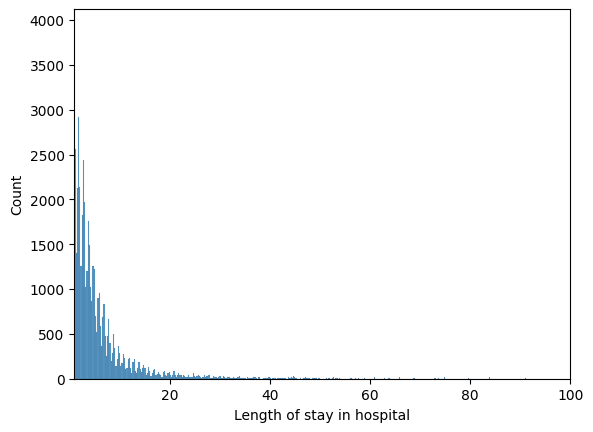

In [31]:
fig, ax = plt.subplots()
sns.histplot(los, cbar_ax=ax)
ax.set_xlim(1, 100)
plt.xlabel("Length of stay in hospital")
plt.show()

In [32]:
df_merged_final['los']=los
df_merged_final

,subject_id,hadm_id,admittime,dischtime,admission_type,admission_location,discharge_location,insurance,language,marital_status,...,first_careunit,last_careunit,curr_service,gender,anchor_age,anchor_year_group,BMI (kg/m2),Weight (Lbs),Inpatient_Flow,los
0,10000032,22595853.0,2180-05-06 22:23:00,2180-05-07 17:15:00,8,8,6,2,1,3,...,9,9,7,0,52,2,18.537500,93.104000,0,0.786111
1,10000032,22841357.0,2180-06-26 18:27:00,2180-06-27 18:49:00,5,2,6,0,1,3,...,9,9,7,0,52,2,18.537500,93.104000,0,1.015278
2,10000032,25742920.0,2180-08-05 23:44:00,2180-08-07 17:50:00,5,2,8,0,1,3,...,9,9,7,0,52,2,18.537500,93.104000,0,1.754167
3,10000032,29079034.0,2180-07-23 12:35:00,2180-07-25 17:55:00,5,2,6,0,1,3,...,2,2,7,0,52,2,18.537500,93.104000,1,2.222222
5,10000084,23052089.0,2160-11-21 01:56:00,2160-11-25 14:52:00,5,10,7,1,1,1,...,9,9,7,1,72,3,24.400000,170.000000,0,4.538889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78757,11654368,23643805.0,2129-09-10 04:02:00,2129-09-12 11:45:00,8,6,6,2,1,1,...,9,9,10,0,31,1,20.800000,115.400000,0,2.321528
78758,11654378,24176611.0,2198-09-14 13:09:00,2198-09-16 15:53:00,5,2,6,1,1,0,...,9,9,7,0,46,0,32.460377,184.133962,0,2.113889
78759,11654378,28760789.0,2203-01-13 04:23:00,2203-01-18 13:00:00,5,2,6,1,1,0,...,9,9,15,0,46,0,32.460377,184.133962,0,5.359028
78760,11654378,29542546.0,2201-03-29 07:15:00,2201-03-29 20:45:00,7,6,6,1,1,0,...,9,9,12,0,46,0,32.460377,184.133962,0,0.562500


In [34]:
percentile_85 = np.percentile(df_merged_final.los, 85)

print("85th percentile:", percentile_85)

85th percentile: 8.842361111111112


In [35]:
df_merged_final=df_merged_final[df_merged_final['los']<9]
df_merged_final

,subject_id,hadm_id,admittime,dischtime,admission_type,admission_location,discharge_location,insurance,language,marital_status,...,first_careunit,last_careunit,curr_service,gender,anchor_age,anchor_year_group,BMI (kg/m2),Weight (Lbs),Inpatient_Flow,los
0,10000032,22595853.0,2180-05-06 22:23:00,2180-05-07 17:15:00,8,8,6,2,1,3,...,9,9,7,0,52,2,18.537500,93.104000,0,0.786111
1,10000032,22841357.0,2180-06-26 18:27:00,2180-06-27 18:49:00,5,2,6,0,1,3,...,9,9,7,0,52,2,18.537500,93.104000,0,1.015278
2,10000032,25742920.0,2180-08-05 23:44:00,2180-08-07 17:50:00,5,2,8,0,1,3,...,9,9,7,0,52,2,18.537500,93.104000,0,1.754167
3,10000032,29079034.0,2180-07-23 12:35:00,2180-07-25 17:55:00,5,2,6,0,1,3,...,2,2,7,0,52,2,18.537500,93.104000,1,2.222222
5,10000084,23052089.0,2160-11-21 01:56:00,2160-11-25 14:52:00,5,10,7,1,1,1,...,9,9,7,1,72,3,24.400000,170.000000,0,4.538889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78757,11654368,23643805.0,2129-09-10 04:02:00,2129-09-12 11:45:00,8,6,6,2,1,1,...,9,9,10,0,31,1,20.800000,115.400000,0,2.321528
78758,11654378,24176611.0,2198-09-14 13:09:00,2198-09-16 15:53:00,5,2,6,1,1,0,...,9,9,7,0,46,0,32.460377,184.133962,0,2.113889
78759,11654378,28760789.0,2203-01-13 04:23:00,2203-01-18 13:00:00,5,2,6,1,1,0,...,9,9,15,0,46,0,32.460377,184.133962,0,5.359028
78760,11654378,29542546.0,2201-03-29 07:15:00,2201-03-29 20:45:00,7,6,6,1,1,0,...,9,9,12,0,46,0,32.460377,184.133962,0,0.562500


In [37]:
na_df=df_merged_final.isna().sum()
na_df

subject_id            0
hadm_id               0
admittime             0
dischtime             0
admission_type        0
admission_location    0
discharge_location    0
insurance             0
language              0
marital_status        0
race                  0
first_careunit        0
last_careunit         0
curr_service          0
gender                0
anchor_age            0
anchor_year_group     0
BMI (kg/m2)           0
Weight (Lbs)          0
Inpatient_Flow        0
los                   0
dtype: int64

In [38]:
X=df_merged_final.iloc[:,4:].drop(columns=['Inpatient_Flow', 'los'])
X

,admission_type,admission_location,discharge_location,insurance,language,marital_status,race,first_careunit,last_careunit,curr_service,gender,anchor_age,anchor_year_group,BMI (kg/m2),Weight (Lbs)
0,8,8,6,2,1,3,28,9,9,7,0,52,2,18.537500,93.104000
1,5,2,6,0,1,3,28,9,9,7,0,52,2,18.537500,93.104000
2,5,2,8,0,1,3,28,9,9,7,0,52,2,18.537500,93.104000
3,5,2,6,0,1,3,28,2,2,7,0,52,2,18.537500,93.104000
5,5,10,7,1,1,1,28,9,9,7,1,72,3,24.400000,170.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78757,8,6,6,2,1,1,28,9,9,10,0,31,1,20.800000,115.400000
78758,5,2,6,1,1,0,28,9,9,7,0,46,0,32.460377,184.133962
78759,5,2,6,1,1,0,28,9,9,15,0,46,0,32.460377,184.133962
78760,7,6,6,1,1,0,28,9,9,12,0,46,0,32.460377,184.133962


In [39]:
X['BMI (kg/m2)']=X['BMI (kg/m2)'].astype(float)
X['Weight (Lbs)']=X['Weight (Lbs)'].astype(float)
X

,admission_type,admission_location,discharge_location,insurance,language,marital_status,race,first_careunit,last_careunit,curr_service,gender,anchor_age,anchor_year_group,BMI (kg/m2),Weight (Lbs)
0,8,8,6,2,1,3,28,9,9,7,0,52,2,18.537500,93.104000
1,5,2,6,0,1,3,28,9,9,7,0,52,2,18.537500,93.104000
2,5,2,8,0,1,3,28,9,9,7,0,52,2,18.537500,93.104000
3,5,2,6,0,1,3,28,2,2,7,0,52,2,18.537500,93.104000
5,5,10,7,1,1,1,28,9,9,7,1,72,3,24.400000,170.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78757,8,6,6,2,1,1,28,9,9,10,0,31,1,20.800000,115.400000
78758,5,2,6,1,1,0,28,9,9,7,0,46,0,32.460377,184.133962
78759,5,2,6,1,1,0,28,9,9,15,0,46,0,32.460377,184.133962
78760,7,6,6,1,1,0,28,9,9,12,0,46,0,32.460377,184.133962


In [40]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
columns = X.columns
X_final = imputer.fit_transform(X)
X_final=pd.DataFrame(X_final, columns=columns)
X_final

,admission_type,admission_location,discharge_location,insurance,language,marital_status,race,first_careunit,last_careunit,curr_service,gender,anchor_age,anchor_year_group,BMI (kg/m2),Weight (Lbs)
0,8.0,8.0,6.0,2.0,1.0,3.0,28.0,9.0,9.0,7.0,0.0,52.0,2.0,18.537500,93.104000
1,5.0,2.0,6.0,0.0,1.0,3.0,28.0,9.0,9.0,7.0,0.0,52.0,2.0,18.537500,93.104000
2,5.0,2.0,8.0,0.0,1.0,3.0,28.0,9.0,9.0,7.0,0.0,52.0,2.0,18.537500,93.104000
3,5.0,2.0,6.0,0.0,1.0,3.0,28.0,2.0,2.0,7.0,0.0,52.0,2.0,18.537500,93.104000
4,5.0,10.0,7.0,1.0,1.0,1.0,28.0,9.0,9.0,7.0,1.0,72.0,3.0,24.400000,170.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47550,8.0,6.0,6.0,2.0,1.0,1.0,28.0,9.0,9.0,10.0,0.0,31.0,1.0,20.800000,115.400000
47551,5.0,2.0,6.0,1.0,1.0,0.0,28.0,9.0,9.0,7.0,0.0,46.0,0.0,32.460377,184.133962
47552,5.0,2.0,6.0,1.0,1.0,0.0,28.0,9.0,9.0,15.0,0.0,46.0,0.0,32.460377,184.133962
47553,7.0,6.0,6.0,1.0,1.0,0.0,28.0,9.0,9.0,12.0,0.0,46.0,0.0,32.460377,184.133962


In [41]:
nax=X_final.isna().sum()
nax

admission_type        0
admission_location    0
discharge_location    0
insurance             0
language              0
marital_status        0
race                  0
first_careunit        0
last_careunit         0
curr_service          0
gender                0
anchor_age            0
anchor_year_group     0
BMI (kg/m2)           0
Weight (Lbs)          0
dtype: int64

In [42]:
X=X_final.iloc[:,:-2].astype(int)
X['BMI (kg/m2)']=X_final['BMI (kg/m2)']
X['Weight (Lbs)']=X_final['Weight (Lbs)']
X

,admission_type,admission_location,discharge_location,insurance,language,marital_status,race,first_careunit,last_careunit,curr_service,gender,anchor_age,anchor_year_group,BMI (kg/m2),Weight (Lbs)
0,8,8,6,2,1,3,28,9,9,7,0,52,2,18.537500,93.104000
1,5,2,6,0,1,3,28,9,9,7,0,52,2,18.537500,93.104000
2,5,2,8,0,1,3,28,9,9,7,0,52,2,18.537500,93.104000
3,5,2,6,0,1,3,28,2,2,7,0,52,2,18.537500,93.104000
4,5,10,7,1,1,1,28,9,9,7,1,72,3,24.400000,170.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47550,8,6,6,2,1,1,28,9,9,10,0,31,1,20.800000,115.400000
47551,5,2,6,1,1,0,28,9,9,7,0,46,0,32.460377,184.133962
47552,5,2,6,1,1,0,28,9,9,15,0,46,0,32.460377,184.133962
47553,7,6,6,1,1,0,28,9,9,12,0,46,0,32.460377,184.133962


In [82]:
y1=df_merged_final['Inpatient_Flow']
y2=df_merged_final['los']

In [83]:
from sklearn.model_selection import train_test_split

X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state=1502)

X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.2, random_state=1502)

In [84]:
X_train

,admission_type,admission_location,discharge_location,insurance,language,marital_status,race,first_careunit,last_careunit,curr_service,gender,anchor_age,anchor_year_group,BMI (kg/m2),Weight (Lbs)
43198,5,2,6,1,1,2,28,9,9,8,1,63,2,20.100000,134.400000
264,7,6,6,1,0,1,28,9,9,15,0,66,2,21.525000,118.380556
26239,6,8,11,1,1,3,28,9,9,12,0,91,3,23.600000,129.210000
19685,6,2,6,2,1,2,14,9,9,7,1,42,0,23.958333,168.240606
39077,8,8,6,2,1,1,9,9,9,15,0,20,0,37.200000,208.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25333,4,2,13,1,1,1,28,9,9,7,0,46,0,29.381053,165.769583
9145,4,6,13,2,1,1,24,9,9,7,1,79,2,39.516667,254.086667
41404,5,2,6,2,1,1,28,2,2,7,1,57,1,27.605128,200.443231
45105,7,6,7,1,1,1,28,9,9,12,0,63,2,32.457143,187.899524


In [81]:
from tensorflow import keras
from tensorflow.keras import layers

# Generate some sample data for regression task
num_samples_regression = 38044
input_dim_regression = 15
regression_targets = y2_train
input_data_regression = X_train

# Generate some sample data for classification task
num_samples_classification = 38044
input_dim_classification = 15
classification_targets = y1_train
input_data_classification = X_train

# Define the neural network architecture for multi-task learning with shared layers
def create_multi_task_model(input_dim_regression, input_dim_classification):
    # Shared layers for both tasks
    shared_layer_1 = layers.Dense(1, activation='relu')

    # Regression input and layers
    inputs_regression = keras.Input(shape=(input_dim_regression,))
    regression_layer_1 = shared_layer_1(inputs_regression)
    regression_output = layers.Dense(1, activation='relu', name='regression_output')(regression_layer_1)

    # Classification input and layers
    inputs_classification = keras.Input(shape=(input_dim_classification,))
    classification_layer_1 = shared_layer_1(inputs_classification)
    classification_output = layers.Dense(1, activation='sigmoid', name='classification_output')(classification_layer_1)

    model = keras.Model(inputs=[inputs_regression, inputs_classification], outputs=[regression_output, classification_output])
    return model

# Create the multi-task model
model = create_multi_task_model(input_dim_regression, input_dim_classification)

# Compile the model with separate loss functions for regression and classification

learning_rate = 0.01
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer,
              loss={'regression_output': 'mean_squared_error', 'classification_output': 'categorical_crossentropy'},
              metrics={'regression_output': 'mae', 'classification_output': 'accuracy'})

# Train the model on different inputs for each task
model.fit([input_data_regression, input_data_classification],
          {'regression_output': regression_targets, 'classification_output': classification_targets},
          epochs=20, batch_size=70)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


544/544 [==============================] - 4s 3ms/step - loss: 14.3586 - regression_output_loss: 14.3586 - classification_output_loss: 0.0000e+00 - regression_output_mae: 3.0648 - classification_output_accuracy: 0.9039
Epoch 2/20
544/544 [==============================] - 1s 2ms/step - loss: 14.3586 - regression_output_loss: 14.3586 - classification_output_loss: 0.0000e+00 - regression_output_mae: 3.0648 - classification_output_accuracy: 0.9039
Epoch 3/20
544/544 [==============================] - 1s 2ms/step - loss: 14.3586 - regression_output_loss: 14.3586 - classification_output_loss: 0.0000e+00 - regression_output_mae: 3.0648 - classification_output_accuracy: 0.9039
Epoch 4/20
544/544 [==============================] - 2s 3ms/step - loss: 14.3586 - regression_output_loss: 14.3586 - classification_output_loss: 0.0000e+00 - regression_output_mae: 3.0648 - classification_output_accuracy: 0.9039
Epoch 5/20
544/544 [==============================] - 2s 3ms/step - loss: 14.3586 - regress

In [86]:
from sklearn.metrics import accuracy_score, mean_absolute_error

In [110]:
num_samples = 38044
input_dim = 15

# Define the multi-task neural network model with shared layers and task-specific layers
def create_multi_task_model(input_dim):
    input_layer = tf.keras.layers.Input(shape=(input_dim,))
    shared_layer1 = tf.keras.layers.Dense(15, activation='relu')(input_layer)

    # Task 1-specific layer (Binary Classification)
    class_specific_layer = tf.keras.layers.Dense(5, activation='relu')(shared_layer1)
    class_output = tf.keras.layers.Dense(1, activation='sigmoid', name='class_output')(class_specific_layer)

    # Task 2-specific layer (Regression)
    reg_specific_layer = tf.keras.layers.Dense(15, activation='relu')(shared_layer1)
    reg_output = tf.keras.layers.Dense(1, activation='relu', name='reg_output')(reg_specific_layer)

    model = tf.keras.models.Model(inputs=input_layer, outputs=[class_output, reg_output])

    return model

# Create the multi-task model
model = create_multi_task_model(input_dim)

# Compile the model with appropriate loss functions for each task
model.compile(optimizer='adam',
              loss=['binary_crossentropy', 'mean_squared_error'],
              metrics={'class_output': 'accuracy', 'reg_output': 'mae'})

# Train the multi-task model
model.fit(X_train,
        {'class_output': y1_train, 'reg_output': y2_train},
        epochs=20, batch_size=32)

# Make predictions on the test data
class_predictions, reg_predictions = model.predict(X_test)

# Evaluate the model's performance on each task
class_accuracy = accuracy_score(y1_test, np.round(class_predictions).flatten())
reg_mae = mean_absolute_error(y2_test, reg_predictions.flatten())

print("Classification Accuracy:", class_accuracy)
print("Regression Mean Absolute Error:", reg_mae)

Epoch 1/20
1189/1189 [==============================] - 5s 3ms/step - loss: 12.4826 - class_output_loss: 3.1021 - reg_output_loss: 9.3805 - class_output_accuracy: 0.8264 - reg_output_mae: 2.1987
Epoch 2/20
1189/1189 [==============================] - 4s 3ms/step - loss: 4.3901 - class_output_loss: 0.2020 - reg_output_loss: 4.1881 - class_output_accuracy: 0.9385 - reg_output_mae: 1.6160
Epoch 3/20
1189/1189 [==============================] - 3s 3ms/step - loss: 4.2739 - class_output_loss: 0.1247 - reg_output_loss: 4.1492 - class_output_accuracy: 0.9653 - reg_output_mae: 1.6024
Epoch 4/20
1189/1189 [==============================] - 3s 3ms/step - loss: 4.1831 - class_output_loss: 0.0886 - reg_output_loss: 4.0945 - class_output_accuracy: 0.9760 - reg_output_mae: 1.5927
Epoch 5/20
1189/1189 [==============================] - 4s 3ms/step - loss: 4.0733 - class_output_loss: 0.0717 - reg_output_loss: 4.0016 - class_output_accuracy: 0.9794 - reg_output_mae: 1.5749
Epoch 6/20
1189/1189 [=======

In [111]:
from sklearn.linear_model import LinearRegression

linear_regressor = LinearRegression()

# Train the model on the training data
linear_regressor.fit(X_train, y2_train)

# Make predictions on the test data
y2_pred = linear_regressor.predict(X_test)

lr_score_MAE = mean_absolute_error(y2_test, y2_pred)
print(f'MAE Score on Test set: {lr_score_MAE:0.2f}')

MAE Score on Test set: 1.53


In [114]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create the KNN Regressor model
knn_model = KNeighborsRegressor(n_neighbors=10, weights='uniform')

# Train the KNN Regressor model
knn_model.fit(X_train, y2_train)

# Make predictions on the test data
y2_pred = knn_model.predict(X_test)

# Evaluate the model's performance
mae = mean_absolute_error(y2_test, y2_pred)

print("Mean Squared Error:", mae)

Mean Squared Error: 1.4519833321650955
